In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd gdrive/My\ Drive/모두의\ 딥러닝/run_project

/content/gdrive/My Drive/모두의 딥러닝/run_project


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
seed = 3

np.random.seed(seed)
tf.random.set_seed(seed)

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip = True,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   fill_mode = "nearest")

In [7]:
train_generator = train_datagen.flow_from_directory(
    "train",
    target_size = (150, 150),
    batch_size = 4,
    class_mode = "binary")

Found 160 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip = True,
                                  width_shift_range = 0.1,
                                  height_shift_range=0.1,
                                  fill_mode = "nearest")

In [9]:
test_generator = test_datagen.flow_from_directory(
    "test",
    target_size = (150, 150),
    batch_size = 4,
    class_mode = "binary"
)

Found 120 images belonging to 2 classes.


In [10]:
transfer_model = VGG16(weights="imagenet", include_top=False,
                       input_shape=(150, 150, 3))
transfer_model.trainalbe = False

In [11]:
transfer_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [12]:
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation="relu"))
finetune_model.add(Dense(2, activation="softmax"))

In [13]:
finetune_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                524352    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 15,239,170
Trainable params: 15,239,170
Non-trainable params: 0
_________________________________________________________________


In [14]:
finetune_model.compile(loss = "sparse_categorical_crossentropy",
                       optimizer = optimizers.Adam(learning_rate=0.0002),
                       metrics = ["accuracy"])

In [15]:
history = finetune_model.fit_generator(train_generator,
                                       steps_per_epoch = 40,
                                       epochs = 20,
                                       validation_data = test_generator,
                                       validation_steps = 4)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
40/40 [==============================] - 5s 123ms/step - loss: 0.7411 - accuracy: 0.5188 - val_loss: 0.7040 - val_accuracy: 0.5000
Epoch 2/20
40/40 [==============================] - 5s 115ms/step - loss: 0.7191 - accuracy: 0.4125 - val_loss: 0.7153 - val_accuracy: 0.4375
Epoch 3/20
40/40 [==============================] - 5s 116ms/step - loss: 0.7225 - accuracy: 0.4750 - val_loss: 0.7031 - val_accuracy: 0.4375
Epoch 4/20
40/40 [==============================] - 5s 116ms/step - loss: 0.7151 - accuracy: 0.5063 - val_loss: 0.6733 - val_accuracy: 0.5625
Epoch 5/20
40/40 [==============================] - 5s 116ms/step - loss: 0.6603 - accuracy: 0.7250 - val_loss: 0.5728 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 5s 116ms/step - loss: 0.3554 - accuracy: 0.8813 - val_loss: 0.4512 - val_accuracy: 0.8750
Epoch 7/20
40/40 [==============================] - 5s 116ms/step - loss

In [16]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
y_vloss = history.history["val_loss"]
y_loss = history.history["loss"]

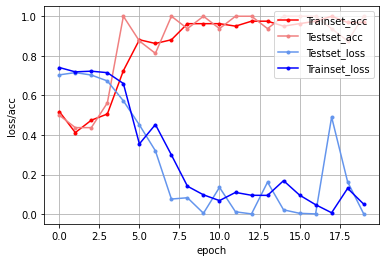

In [17]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker = ".", c = "red", label = "Trainset_acc")
plt.plot(x_len, val_acc, marker = ".", c = "lightcoral", label = "Testset_acc")
plt.plot(x_len, y_vloss, marker = ".", c = "cornflowerblue", label = "Testset_loss")
plt.plot(x_len, y_loss, marker =".", c = "blue", label = "Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = "upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss/acc")
plt.show()